In [1]:
import pandas as pd
import os                       # for testing use only
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC

from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')
#from sklearn.linear_model import LinearRegression
#sklearn.linear_model.LinearRegression()

In [2]:
data=pd.read_csv('df_wine_clean.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2876 non-null   object 
 1   type          2876 non-null   float64
 2   price         2876 non-null   float64
 3   vintage       2876 non-null   float64
 4   alcohol       2876 non-null   float64
 5   bottle size   2876 non-null   float64
 6   country       2876 non-null   int64  
 7   region        2876 non-null   int64  
 8   grapespecies  2876 non-null   int64  
 9   producer      2876 non-null   object 
 10  Text wine     2876 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 247.3+ KB


In [3]:
# model import
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# create the model
reg = LinearRegression()
cols = ['type', 'vintage','alcohol','bottle size','country','region','grapespecies']
X = data[cols]
y = data['price']
# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# model.fit
from sklearn.metrics import mean_squared_error
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

71.47465132765682

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

In [6]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.647023971253397
RMSE value for k=  2 is: 9.32167643752468
RMSE value for k=  3 is: 8.889229414050314
RMSE value for k=  4 is: 8.471134375030678
RMSE value for k=  5 is: 8.328859810505609
RMSE value for k=  6 is: 8.299091654496753
RMSE value for k=  7 is: 8.277782711865434
RMSE value for k=  8 is: 8.212071215935659
RMSE value for k=  9 is: 8.193893611037556
RMSE value for k=  10 is: 8.27658849053562
RMSE value for k=  11 is: 8.285874371211554
RMSE value for k=  12 is: 8.296411954148253
RMSE value for k=  13 is: 8.286151447588725
RMSE value for k=  14 is: 8.310688581765628
RMSE value for k=  15 is: 8.330543314151281
RMSE value for k=  16 is: 8.304317482994692
RMSE value for k=  17 is: 8.362245341565714
RMSE value for k=  18 is: 8.351027540422962
RMSE value for k=  19 is: 8.342799926946377
RMSE value for k=  20 is: 8.386758891749144


<AxesSubplot:>

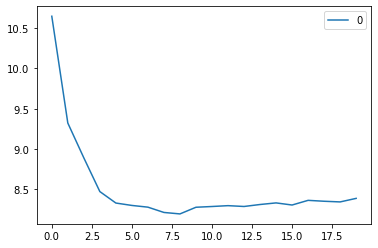

In [7]:
#plotting the rmse values against k values

curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [8]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[7,8,9,11,13,15,17,19]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_
#model.best_score_

{'n_neighbors': 13}

In [9]:
model.best_score_

0.3180214915477615